<a href="https://colab.research.google.com/github/divya-2005-ctrl/Projects/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# (Optional) ensure required libs - Colab already has these, but safe to run
!pip install -q pandas numpy matplotlib seaborn scikit-learn joblib


In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Then copy file into working dir (example):
# !cp /content/drive/MyDrive/path/to/titanic.csv /content/


Mounted at /content/drive


In [3]:
!wget -O titanic.csv "https://raw.githubusercontent.com/your/repo/path/titanic.csv"


--2025-12-12 15:04:54--  https://raw.githubusercontent.com/your/repo/path/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-12-12 15:04:54 ERROR 404: Not Found.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # for saving model

# Load dataset (adjust path if using Drive)
df = pd.read_csv('/content/titanic.csv')
df.head()


EmptyDataError: No columns to parse from file

In [8]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [9]:
!wget -O titanic.csv https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
df = pd.read_csv("titanic.csv")


--2025-12-12 15:12:04--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2025-12-12 15:12:04 (4.69 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # for saving model

# Load dataset (adjust path if using Drive)
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (many nulls) and PassengerId, Ticket, Name if present
drop_cols = [c for c in ['Cabin','Ticket','Name','PassengerId'] if c in df.columns]
df.drop(columns=drop_cols, inplace=True)

# Create FamilySize, IsAlone (optional)
if 'SibSp' in df.columns and 'Parch' in df.columns:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


/tmp/ipython-input-2242674824.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2242674824.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [13]:
# Encode Sex
if 'Sex' in df.columns:
    df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# One-hot encode Embarked if present
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,2,0,False,True
1,1,1,0,38.0,1,0,71.2833,2,0,False,False
2,1,3,0,26.0,0,0,7.9250,1,1,False,True
3,1,1,0,35.0,1,0,53.1000,2,0,False,True
4,0,3,1,35.0,0,0,8.0500,1,1,False,True


In [14]:
# Ensure target column exists
assert 'Survived' in df.columns, "No 'Survived' column — check dataset."

X = df.drop('Survived', axis=1)
y = df['Survived']

# Some columns could be non-numeric if you didn't drop them; drop/encode as needed
# Quick check:
non_numeric = X.select_dtypes(include=['object']).columns.tolist()
print("Non-numeric features (should be none):", non_numeric)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


Non-numeric features (should be none): []


In [15]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# cross-validation (optional)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("CV accuracy (train):", cv_scores.mean())


CV accuracy (train): 0.7894809415936177


In [16]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8212290502793296

Confusion matrix:
 [[96 14]
 [18 51]]

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [17]:
# Save model
joblib.dump(model, '/content/titanic_rf_model.joblib')
print("Saved model to /content/titanic_rf_model.joblib")

# Optional: predict a new passenger (example)
new_passenger = pd.DataFrame({
    'Pclass':[3],'Sex':[1],'Age':[25],'SibSp':[0],'Parch':[0],'Fare':[7.25],
    # add Embarked_Q/Embarked_S if present in X
})
# Align columns with X
new_passenger = new_passenger.reindex(columns=X.columns, fill_value=0)
print("Predicted (1=survived,0=not):", model.predict(new_passenger)[0])


Saved model to /content/titanic_rf_model.joblib
Predicted (1=survived,0=not): 0


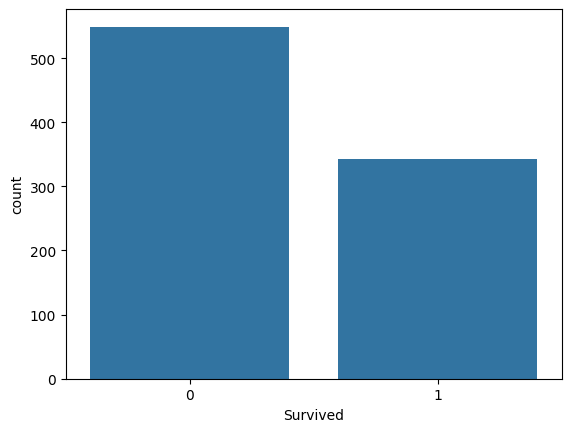

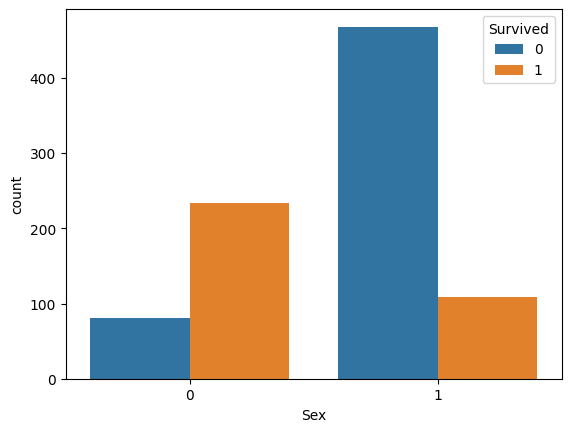

In [18]:
sns.countplot(x='Survived', data=df)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()
